In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the csv file
#### Make sure that the csv file and the .ipynb are in the same directory

In [2]:
df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv') # this is pandas function
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,15,18,18,21,23,25,30,30,30,33
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,23,23,23,23,24,25,26,26,26,26
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,256,275,293,313,326,336,348,364,367,375
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,26,26,29,29,31,33,33,35,35,36
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,2,2,2,2,2,2,3,3,3,3
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,82,83,90,97,102,111,115,123,129,132
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,12,13,13,14,16,17,18,19,20,20
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,2,2,2,2,2,3,3,3,3,3
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,0,0,...,22,23,24,25,25,25,25,26,26,26


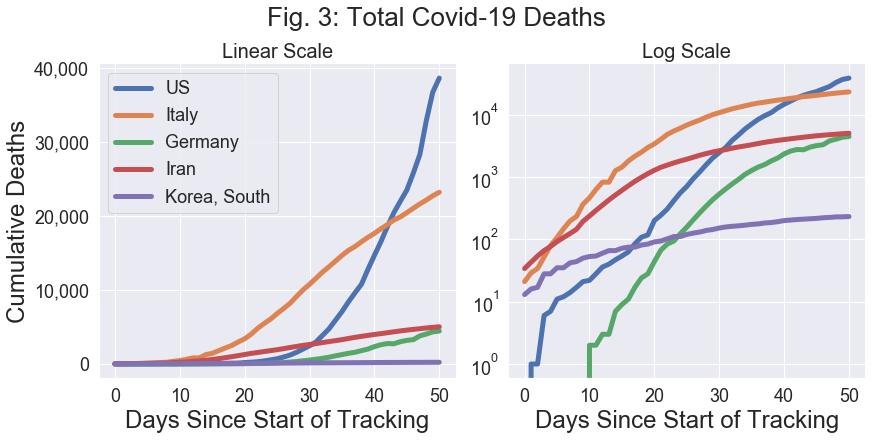

In [3]:
import matplotlib as mpl
##Cumulative Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']

fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
fig.suptitle('Fig. 3: Total Covid-19 Deaths',fontsize=26)

for country in countries:
    df_country = df_deaths[df_deaths['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':'4/18/20']
#    print(data_country)

    for a in ax:
        a.plot(data_country.values, label=country, linewidth=5)
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0].set_title('Linear Scale', fontsize=20)
ax[0].set_ylabel('Cumulative Deaths',fontsize=24)
ax[0].legend(fontsize=18,loc='best')
ax[1].set_title('Log Scale', fontsize=20)
ax[1].set_yscale('log')
plt.show()
    

# save your figure
#fig.savefig('total_covid_deaths.jpg')

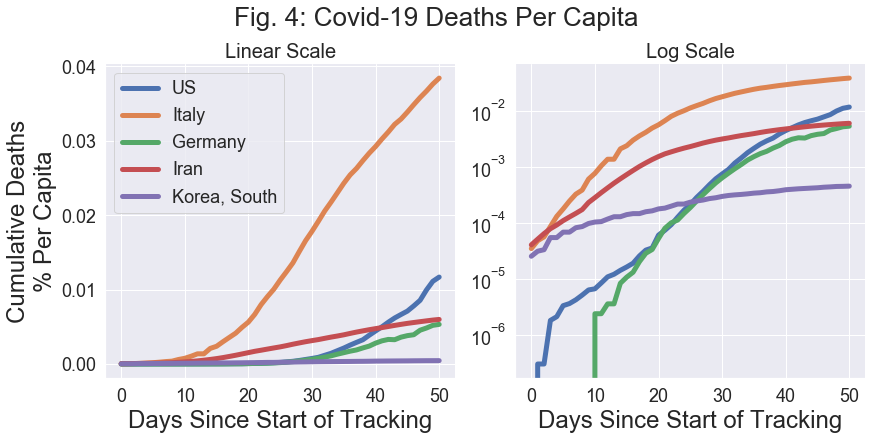

In [4]:
##Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(1,2,figsize=(12,6),constrained_layout=True)
fig.suptitle('Fig. 4: Covid-19 Deaths Per Capita',fontsize=26)

for country,pop in zip(countries,per_capita):
    df_country = df_deaths[df_deaths['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':'4/18/20']
    data_country /= pop
    data_country *= 100
#    print(country, data_country)

    for a in ax:
        a.plot(data_country.values, label=country, linewidth=5)
        a.set_xlabel('Days Since Start of Tracking',fontsize=24)
        a.tick_params(labelsize=18)
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)

#ax.set_ylim(1,700000)

ax[0].set_title('Linear Scale', fontsize=20)
ax[0].set_ylabel('Cumulative Deaths\n% Per Capita',fontsize=24)
ax[0].legend(fontsize=18,loc='best')
ax[1].set_title('Log Scale', fontsize=20)
ax[1].set_yscale('log')
ax[1].set_ylim()

plt.show()

# save your figure
fig.savefig('percapita_covid_deaths.jpg')

# 4-Panel Subplots Showing Deaths

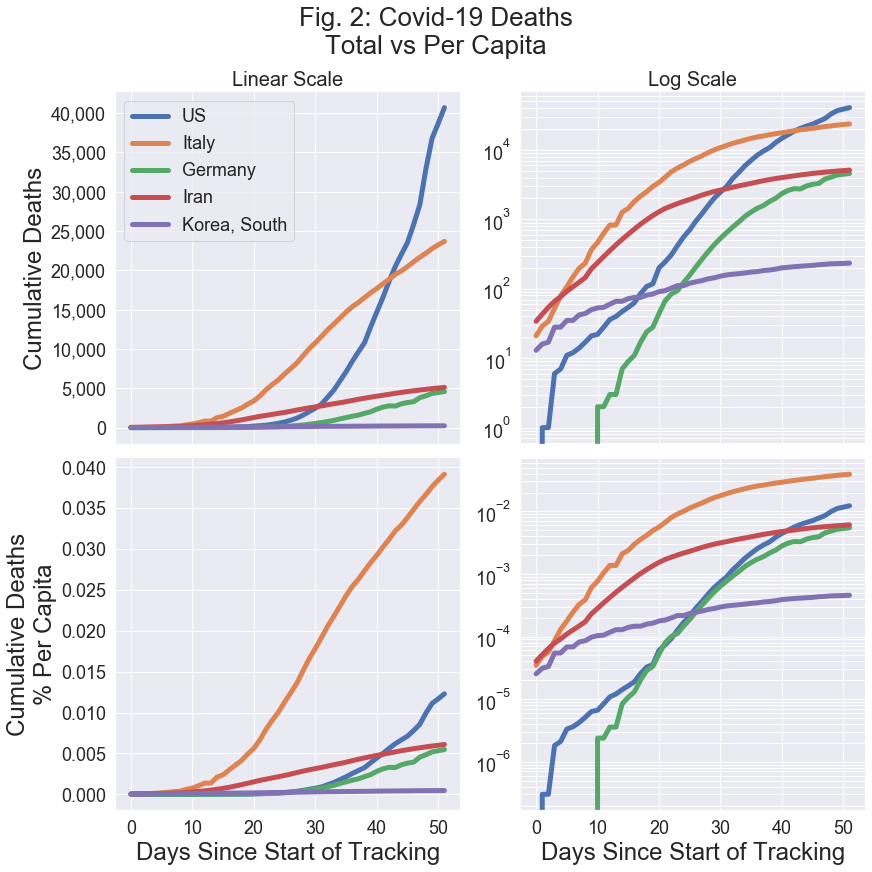

In [20]:
import matplotlib as mpl
##Cumulative and Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)
fig.suptitle('Fig. 2: Covid-19 Deaths\nTotal vs Per Capita',fontsize=26)

for country,pop in zip(countries, per_capita):
    df_country = df_deaths[df_deaths['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':]
#    print(data_country)

    for a in ax[0]:
        a.plot(data_country.values, label=country, linewidth=5)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.xaxis.set_ticklabels([])
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.grid(b=True,which='both',axis='both')
        
    for b in ax[1]:
        b.plot((data_country.values/pop)*100, label=country, linewidth=5)
        b.tick_params(labelsize=18)
        b.set_xlabel('Days Since Start of Tracking',fontsize=24)
        b.spines['right'].set_visible(False)
        b.spines['top'].set_visible(False)
        b.grid(b=True,which='both',axis='both')

#ax.set_ylim(1,700000)

ax[0,0].set_title('Linear Scale', fontsize=20)
ax[0,0].set_ylabel('Cumulative Deaths',fontsize=24)
ax[0,0].legend(fontsize=18,loc='best')
ax[0,1].set_title('Log Scale', fontsize=20)
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,0].set_ylabel('Cumulative Deaths\n% Per Capita',fontsize=24)
plt.show()

# save your figure
fig.savefig('all_covid_deaths.jpg')

In [6]:
df_cases = pd.read_csv('time_series_covid19_confirmed_global.csv') # this is pandas function
df_cases

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,521,555,607,665,714,784,840,906,933,996
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,416,433,446,467,475,494,518,539,548,562
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,601,601,638,646,659,673,673,696,704,713
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,24,24
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,19,21,21,23,23,23,23,23,23,23
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,1975,1975,2142,2208,2277,2443,2571,2669,2758,2839
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,937,967,1013,1039,1067,1111,1159,1201,1248,1291
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,103,103,103,102,103,103,103,103,103,103
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,2822,2857,2857,2863,2870,2886,2897,2926,2926,2926


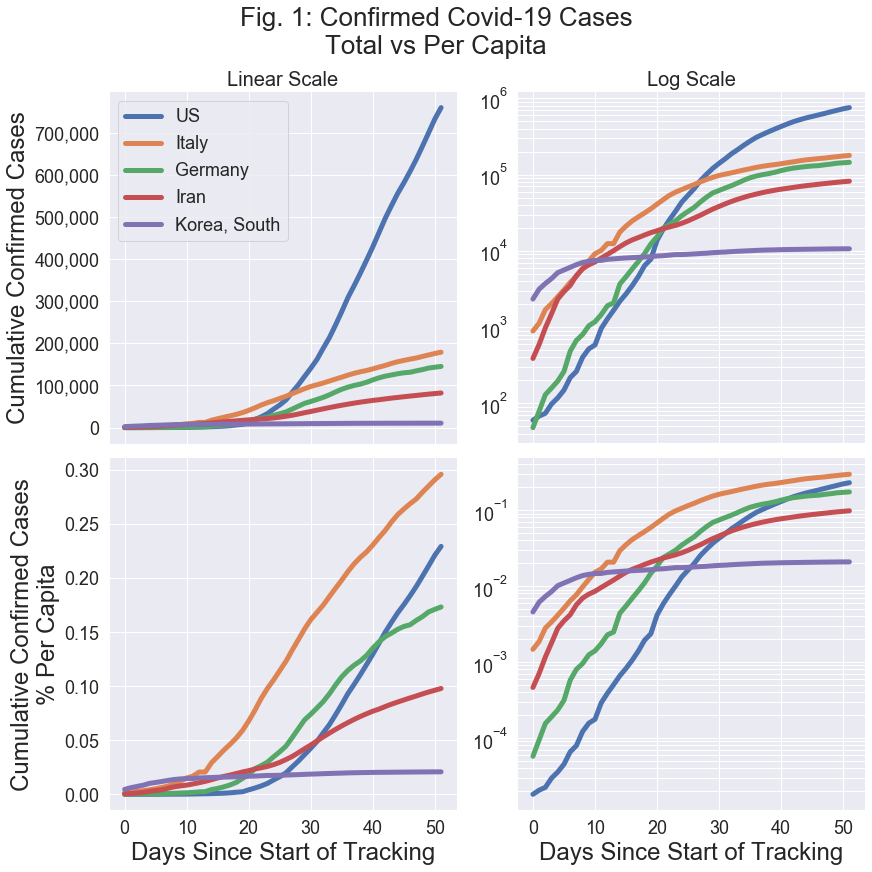

In [24]:
import matplotlib as mpl
##Cumulative and Per Capita Deaths
countries = ['US', 'Italy', 'Germany', 'Iran', 'Korea, South']
per_capita = [331002651, 60461826, 83783942, 83992949, 51269185]

fig,ax = plt.subplots(2,2,figsize=(12,12),constrained_layout=True)
fig.suptitle('Fig. 1: Confirmed Covid-19 Cases\nTotal vs Per Capita',fontsize=26)

for country,pop in zip(countries, per_capita):
    df_country = df_cases[df_cases['Country/Region'] == country]
    df_country = df_country.set_index('Country/Region', drop = True) # set pandas dataframe index to country
    df_country = df_country.drop(columns=['Lat','Long','Province/State'])
    
    data_country = df_country.loc[country,'2/28/20':]
#    print(data_country)

    for a in ax[0]:
        a.plot(data_country.values, label=country, linewidth=5)
        a.tick_params(labelsize=18)
        a.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
        a.xaxis.set_ticklabels([])
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.grid(b='True',which='both',axis='both')
        
    for b in ax[1]:
        b.plot((data_country.values/pop)*100, label=country, linewidth=5)
        b.tick_params(labelsize=18)
        b.set_xlabel('Days Since Start of Tracking',fontsize=24)
        b.spines['right'].set_visible(False)
        b.spines['top'].set_visible(False)
        b.grid(b='True',which='both')

#ax.set_ylim(1,700000)

ax[0,0].set_title('Linear Scale', fontsize=20)
ax[0,0].set_ylabel('Cumulative Confirmed Cases',fontsize=24)
ax[0,0].legend(fontsize=18,loc='best')
ax[0,1].set_title('Log Scale', fontsize=20)
ax[0,1].set_yscale('log')
ax[1,1].set_yscale('log')
ax[1,0].set_ylabel('Cumulative Confirmed Cases\n% Per Capita',fontsize=24)
plt.show()

# save your figure
fig.savefig('all_covid_cases.jpg')